## Generate barplots for the mappings of BioPAX resources to UniProt and ChEBI for nine pathway databases

#### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#### Concatenate query results of mappings

In [3]:
# Concatenate query results for UniProt mappings
reactome_v87_mappings_uniprot = pd.read_csv("../Results/reactome_v87_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
panther_standalone_mappings_uniprot = pd.read_csv("../Results/panther_standalone_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
reactome_pc_mappings_uniprot = pd.read_csv("../Results/reactome_pc_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
panther_pathway_pc_mappings_uniprot = pd.read_csv("../Results/panther_pc_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
pathbank_pc_mappings_uniprot = pd.read_csv("../Results/pathbank_pc_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
humancyc_pc_mappings_uniprot = pd.read_csv("../Results/humancyc_pc_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
kegg_pathway_pc_mappings_uniprot = pd.read_csv("../Results/kegg_pc_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
pid_pc_mappings_uniprot = pd.read_csv("../Results/pid_pc_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
inoh_pc_mappings_uniprot = pd.read_csv("../Results/inoh_pc_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)
netpath_pc_mappings_uniprot = pd.read_csv("../Results/netpath_pc_mappings_uniprot.csv", sep=",", skiprows=1, header=None, index_col=0)

concat_df_uniprot = pd.concat([reactome_v87_mappings_uniprot, panther_standalone_mappings_uniprot[1], reactome_pc_mappings_uniprot[1], panther_pathway_pc_mappings_uniprot[1], pathbank_pc_mappings_uniprot[1], humancyc_pc_mappings_uniprot[1], kegg_pathway_pc_mappings_uniprot[1], pid_pc_mappings_uniprot[1], inoh_pc_mappings_uniprot[1], netpath_pc_mappings_uniprot[1]], axis=1, ignore_index=True)
concat_df_uniprot.columns = ["reactome_v87", "panther_standalone_biopax", "reactome_pc", "panther_pathway_pc", "pathbank_pc", "humancyc_pc", "kegg_pathway_pc", "pid_pc", "inoh_pc", "netpath_pc"]
concat_df_uniprot.to_csv("../Results/Mappings_Uniprot.csv", sep=",")

# Concatenate query results for ChEBI mappings
reactome_v87_mappings_chebi = pd.read_csv("../Results/reactome_v87_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
panther_standalone_mappings_chebi = pd.read_csv("../Results/panther_standalone_biopax_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
reactome_pc_mappings_chebi = pd.read_csv("../Results/reactome_pc_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
panther_pathway_pc_mappings_chebi = pd.read_csv("../Results/panther_pc_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
pathbank_pc_mappings_chebi = pd.read_csv("../Results/pathbank_pc_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
humancyc_pc_mappings_chebi = pd.read_csv("../Results/humancyc_pc_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
kegg_pathway_pc_mappings_chebi = pd.read_csv("../Results/kegg_pc_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
pid_pc_mappings_chebi = pd.read_csv("../Results/pid_pc_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
inoh_pc_mappings_chebi = pd.read_csv("../Results/inoh_pc_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)
netpath_pc_mappings_chebi = pd.read_csv("../Results/netpath_pc_mappings_chebi.csv", sep=",", skiprows=1, header=None, index_col=0)

concat_df_chebi = pd.concat([reactome_v87_mappings_chebi, panther_standalone_mappings_chebi[1], reactome_pc_mappings_chebi[1], panther_pathway_pc_mappings_chebi[1], pathbank_pc_mappings_chebi[1], humancyc_pc_mappings_chebi[1], kegg_pathway_pc_mappings_chebi[1], pid_pc_mappings_chebi[1], inoh_pc_mappings_chebi[1], netpath_pc_mappings_chebi[1]], axis=1, ignore_index=True)
concat_df_chebi.columns = ["reactome_v87", "panther_standalone_biopax", "reactome_pc", "panther_pathway_pc", "pathbank_pc", "humancyc_pc", "kegg_pathway_pc", "pid_pc", "inoh_pc", "netpath_pc"]
concat_df_chebi.to_csv("../Results/Mappings_ChEBI.csv", sep=",")

## Mappings to UniProt

#### Preprocess data

In [21]:
def preprocess_data_uniprot(df,col: str):
    print(col)
    new_df = df[[col]].copy()
    no_pr = new_df[col].values[1]
    no_map = new_df[col].values[2]
    uniprot_map = new_df[col].values[4]
    unique_uniprot = new_df[col].values[5]
    new_df["no pr"] = [no_pr, 0, 0, 0, 0, 0]
    new_df["no map"] = [no_map, 0, 0, 0, 0, 0]
    new_df["unique uniprot"] = [unique_uniprot, 0, 0, 0, 0, 0]
    new_df = new_df.drop([col], axis=1)
    new_df = new_df.drop(["Protein with no PR", "Protein with no mapping", "Uniprot mappings", "ProteinReference"])
    new_df[col] = [uniprot_map, unique_uniprot]
    return new_df


def replace_nan_with_zero(df):
    return df.fillna(0)


subdata_reactome_v87_uniprot = preprocess_data_uniprot(concat_df_uniprot, "reactome_v87")
subdata_panther_standalone_uniprot = preprocess_data_uniprot(concat_df_uniprot, "panther_standalone_biopax")
subdata_panther_standalone_uniprot = replace_nan_with_zero(subdata_panther_standalone_uniprot)
print(subdata_reactome_v87_uniprot)

subdata_reactome_pc_uniprot = preprocess_data_uniprot(concat_df_uniprot, "reactome_pc")
subdata_panther_pathway_pc_uniprot = preprocess_data_uniprot(concat_df_uniprot, "panther_pathway_pc")
subdata_panther_pathway_pc_uniprot = replace_nan_with_zero(subdata_panther_pathway_pc_uniprot)

subdata_humancyc_pc_uniprot = preprocess_data_uniprot(concat_df_uniprot, "humancyc_pc")
subdata_pathbank_pc_uniprot = preprocess_data_uniprot(concat_df_uniprot, "pathbank_pc")
subdata_kegg_pathway_pc_uniprot = preprocess_data_uniprot(concat_df_uniprot, "kegg_pathway_pc")
subdata_pid_pc_uniprot = preprocess_data_uniprot(concat_df_uniprot, "pid_pc")
subdata_inoh_pc_uniprot = preprocess_data_uniprot(concat_df_uniprot, "inoh_pc")
subdata_inoh_pc_uniprot = replace_nan_with_zero(subdata_inoh_pc_uniprot)

subdata_netpath_pc_uniprot = preprocess_data_uniprot(concat_df_uniprot, "netpath_pc")

reactome_v87
panther_standalone_biopax
                no pr  no map  unique uniprot  reactome_v87
0                                                          
Protein          3217     755           11512         27887
Unique Uniprot      0       0               0         11512
reactome_pc
panther_pathway_pc
humancyc_pc
pathbank_pc
kegg_pathway_pc
pid_pc
inoh_pc
netpath_pc


#### Generate barplots for Reactome (standalone export version 87 and PathwayCommons export), Panther PATHWAY (standalone export and PathwayCommons export), PathBank (PathwayCommons), HumanCyc (PathwayCommons) and KEGG (PathwayCommons)

#### Figure 4

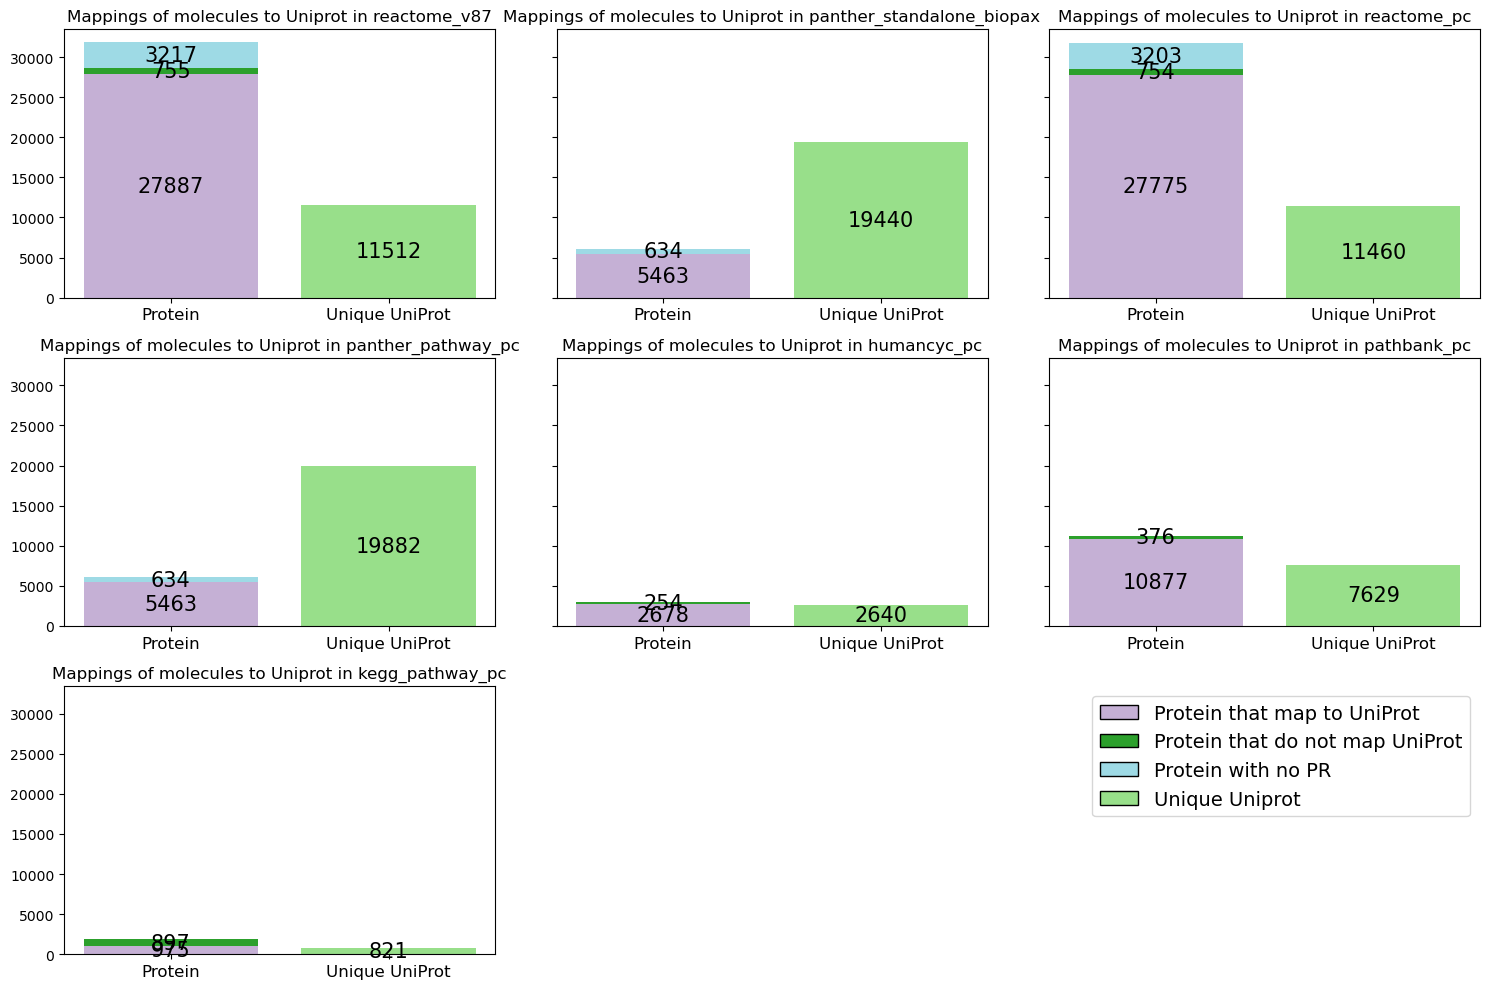

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharey=True)
uniprot_abs = ["Protein", "Unique UniProt"]

def plot_stack_barplot_uniprot(ax, col, new_df):
    bars1 = ax.bar(uniprot_abs, new_df[col], color=["#C5B0D5", "#98DF8A"])
    bars2 = ax.bar(uniprot_abs, new_df["no map"], bottom=new_df[col], color="#2CA02C")
    bars3 = ax.bar(uniprot_abs, new_df["no pr"], bottom=new_df[col] + new_df["no map"], color="#9EDAE5")
    ax.tick_params(axis='x', labelsize=12)
    ax.set_title(f"Mappings of molecules to Uniprot in {col}", fontsize=12)

    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            if height != 0:
                height = bar.get_height()
                bottom = bar.get_y()
                ax.text(bar.get_x() + bar.get_width()/2., bottom + height/2, '%d' % int(height), ha='center', va='center', fontsize=15)

# Define the legend
legend_elements = [
    Patch(facecolor="#C5B0D5", edgecolor='black', label='Protein that map to UniProt'),
    Patch(facecolor="#2CA02C", edgecolor='black', label='Protein that do not map UniProt'),
    Patch(facecolor="#9EDAE5", edgecolor='black', label='Protein with no PR'),
    Patch(facecolor="#98DF8A", edgecolor='black', label='Unique Uniprot')
]

# Place the legend outside the plot
plt.legend(handles=legend_elements, loc="upper right", fontsize=14)

# Plot the 7 subplots
plot_stack_barplot_uniprot(ax=axs[0, 0], col="reactome_v87", new_df=subdata_reactome_v87_uniprot)
plot_stack_barplot_uniprot(ax=axs[0, 1], col="panther_standalone_biopax", new_df=subdata_panther_standalone_uniprot)
plot_stack_barplot_uniprot(ax=axs[0, 2], col="reactome_pc", new_df=subdata_reactome_pc_uniprot)
plot_stack_barplot_uniprot(ax=axs[1, 0], col="panther_pathway_pc", new_df=subdata_panther_pathway_pc_uniprot)
plot_stack_barplot_uniprot(ax=axs[1, 1], col="humancyc_pc", new_df=subdata_humancyc_pc_uniprot)
plot_stack_barplot_uniprot(ax=axs[1, 2], col="pathbank_pc", new_df=subdata_pathbank_pc_uniprot)
plot_stack_barplot_uniprot(ax=axs[2, 0], col="kegg_pathway_pc", new_df=subdata_kegg_pathway_pc_uniprot)

# Hide the empty last subplot
axs[2, 1].axis('off')
axs[2, 2].axis('off')

# Adjust layout to fit everything neatly
plt.tight_layout()

# Save the figures
plt.savefig("../Results/Fig4_Mappings_UniProt.png", dpi=300)
plt.savefig("../Results/Fig4_Mappings_UniProt.svg", dpi=300)

# Display the plot
plt.show()



## Mappings to ChEBI

#### Preprocess data

In [27]:
def preprocess_data_chebi(df,col: str):
    print(col)
    new_df = df[[col]].copy()
    no_smr = new_df[col].values[5]
    no_map = new_df[col].values[3]
    chebi_map = new_df[col].values[0]
    unique_chebi = new_df[col].values[4]
    new_df["no smr"] = [no_smr, 0, 0, 0, 0, 0]
    new_df["no map"] = [no_map, 0, 0, 0, 0, 0]
    new_df["unique chebi"] = [unique_chebi, 0, 0, 0, 0, 0]
    new_df = new_df.drop([col], axis=1)
    new_df = new_df.drop(["noSMR", "Smnomapping", "SmallMolecule", "SmallMoleculeReference"])
    new_df[col] = [chebi_map, unique_chebi]
    new_df.rename(columns={"ChEBI mappings":"SmallMolecule"})
    print(new_df)
    print(" ")
    return new_df


subdata_reactome_v87_chebi= preprocess_data_chebi(concat_df_chebi, "reactome_v87")
subdata_reactome_pc_chebi = preprocess_data_chebi(concat_df_chebi, "reactome_pc")
subdata_panther_standalone_chebi = preprocess_data_chebi(concat_df_chebi, "panther_standalone_biopax")
subdata_panther_standalone_chebi = replace_nan_with_zero(subdata_panther_standalone_chebi)
print(subdata_reactome_v87_chebi)

subdata_panther_pathway_pc_chebi = preprocess_data_chebi(concat_df_chebi, "panther_pathway_pc")
subdata_panther_pathway_pc_chebi = replace_nan_with_zero(subdata_panther_pathway_pc_chebi)
print(subdata_panther_pathway_pc_chebi)
subdata_humancyc_pc_chebi = preprocess_data_chebi(concat_df_chebi, "humancyc_pc")
subdata_pathbank_pc_chebi = preprocess_data_chebi(concat_df_chebi, "pathbank_pc")
subdata_kegg_pathway_pc_chebi = preprocess_data_chebi(concat_df_chebi, "kegg_pathway_pc")
subdata_pid_pc_chebi = preprocess_data_chebi(concat_df_chebi, "pid_pc")
subdata_inoh_pc_chebi = preprocess_data_chebi(concat_df_chebi, "inoh_pc")
subdata_inoh_pc_chebi = replace_nan_with_zero(subdata_inoh_pc_chebi)
subdata_netpath_pc_chebi = preprocess_data_chebi(concat_df_chebi, "netpath_pc")

reactome_v87
                no smr  no map  unique chebi  reactome_v87
0                                                         
ChEBI mappings     510    1046          2008          3673
Unique ChEBI         0       0             0          2008
 
reactome_pc
                no smr  no map  unique chebi  reactome_pc
0                                                        
ChEBI mappings     510    1046          2007         3667
Unique ChEBI         0       0             0         2007
 
panther_standalone_biopax
                no smr  no map  unique chebi  panther_standalone_biopax
0                                                                      
ChEBI mappings     413       0           358                       1820
Unique ChEBI         0       0             0                        358
 
                no smr  no map  unique chebi  reactome_v87
0                                                         
ChEBI mappings     510    1046          2008          3673
Unique ChE

#### Generate barplots for Reactome (standalone export version 87 and PathwayCommons export), Panther (PathwayCommons), PathBank (PathwayCommons), HumanCyc (PathwayCommons) and KEGG (PathwayCommons)

#### Figure 5

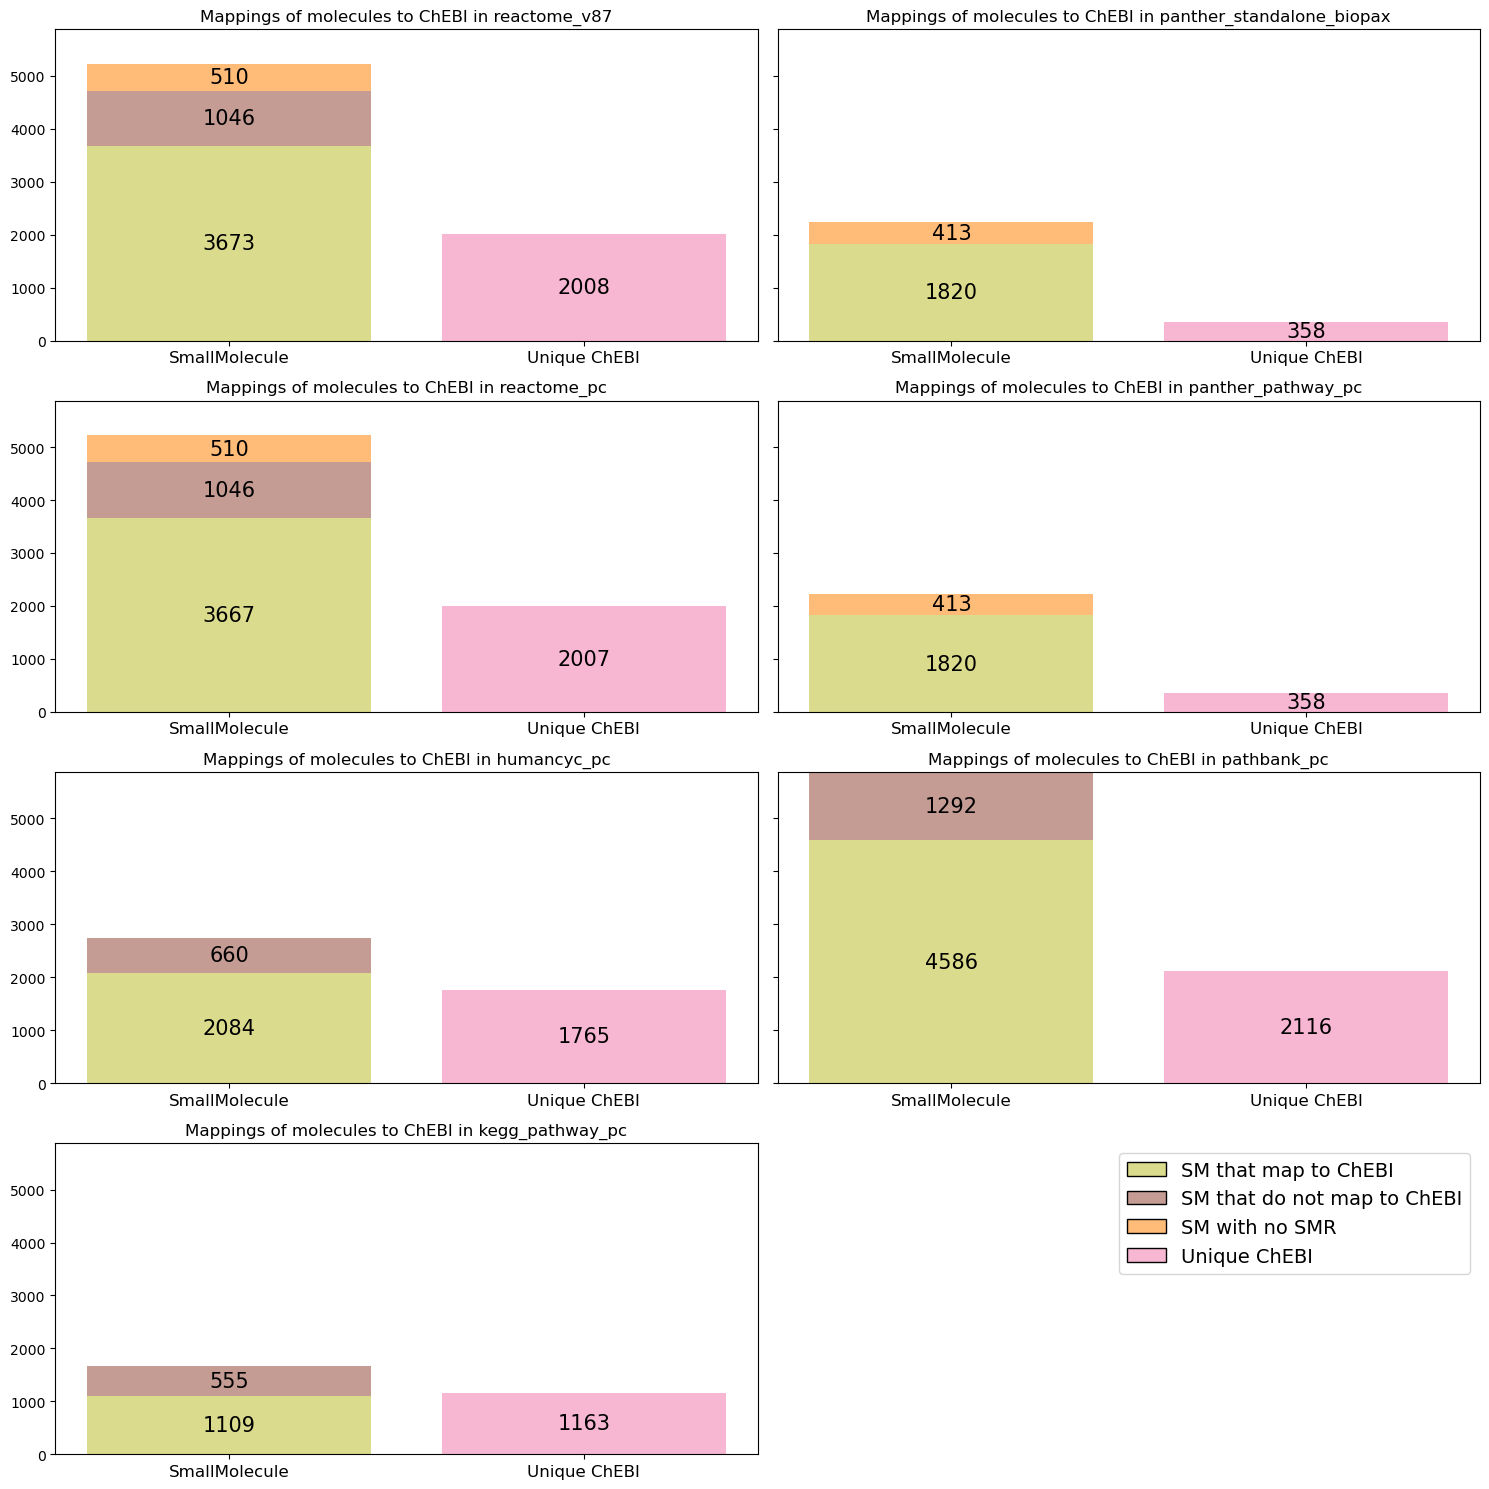

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15), sharey=True)
chebi_abs = ["SmallMolecule", "Unique ChEBI"]

def plot_stack_barplot_chebi(ax, col, new_df):
    bars1 = ax.bar(chebi_abs, new_df[col], color=["#DBDB8D", "#F7B6D2"])
    bars2 = ax.bar(chebi_abs, new_df["no map"], bottom=new_df[col] , color="#C49C94")
    bars3 = ax.bar(chebi_abs, new_df["no smr"], bottom=new_df["no map"]+new_df[col], color="#FFBB78")
    #ax.legend(["count 1", "Small Molecule with no SMR", "SMR that do not map to ChEBI"])
    ax.tick_params(axis='x', labelsize=12)
    ax.set_title(f"Mappings of molecules to ChEBI in {col}", fontsize=12)

    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            if height != 0:
                height = bar.get_height()
                bottom = bar.get_y()
                ax.text(bar.get_x() + bar.get_width()/2., bottom + height/2, '%d' % int(height), ha='center', va='center', fontsize=15)


legend_elements = [
    Patch(facecolor="#DBDB8D", edgecolor='black', label='SM that map to ChEBI'),
    Patch(facecolor='#C49C94', edgecolor='black', label='SM that do not map to ChEBI'),
    Patch(facecolor="#FFBB78", edgecolor='black', label='SM with no SMR'),
    Patch(facecolor= "#F7B6D2", edgecolor='black', label='Unique ChEBI')
    ]
plt.legend(handles=legend_elements, loc = "upper right", fontsize=14)


reactome_v87 = plot_stack_barplot_chebi(ax=axs[0, 0], col="reactome_v87", new_df=subdata_reactome_v87_chebi)
panther_standalone = plot_stack_barplot_chebi(ax=axs[0, 1], col="panther_standalone_biopax", new_df=subdata_panther_standalone_chebi)
reactome_pc = plot_stack_barplot_chebi(ax=axs[1, 0], col="reactome_pc", new_df=subdata_reactome_pc_chebi)
panther_pc = plot_stack_barplot_chebi(ax=axs[1, 0], col="panther_pathway_pc", new_df=subdata_panther_pathway_pc_chebi)
panther_pathway_pc = plot_stack_barplot_chebi(ax=axs[1, 1], col="panther_pathway_pc", new_df=subdata_panther_pathway_pc_chebi)
humancyc_pc = plot_stack_barplot_chebi(ax=axs[2, 0], col="humancyc_pc", new_df=subdata_humancyc_pc_chebi)
pathbank_pc = plot_stack_barplot_chebi(ax=axs[2, 1], col="pathbank_pc", new_df=subdata_pathbank_pc_chebi)
kegg_pathway_pc = plot_stack_barplot_chebi(ax=axs[3, 0], col="kegg_pathway_pc", new_df=subdata_kegg_pathway_pc_chebi)

# Hide the empty last subplot
axs[3, 1].axis('off')

plt.tight_layout()
plt.savefig("../Results/Fig5_Mappings_ChEBI.png", dpi=300)
plt.savefig("../Results/Fig5_Mappings_ChEBI.svg", dpi=300)
plt.show()


### Supplementary Figures

The supplementary figures are the same barplots but including the pathway databases that are not maintained: PID (PathwayCommons), INOH (PathwayCommons) and NetPath (PathwayCommons)

#### Supplementary Figure S4

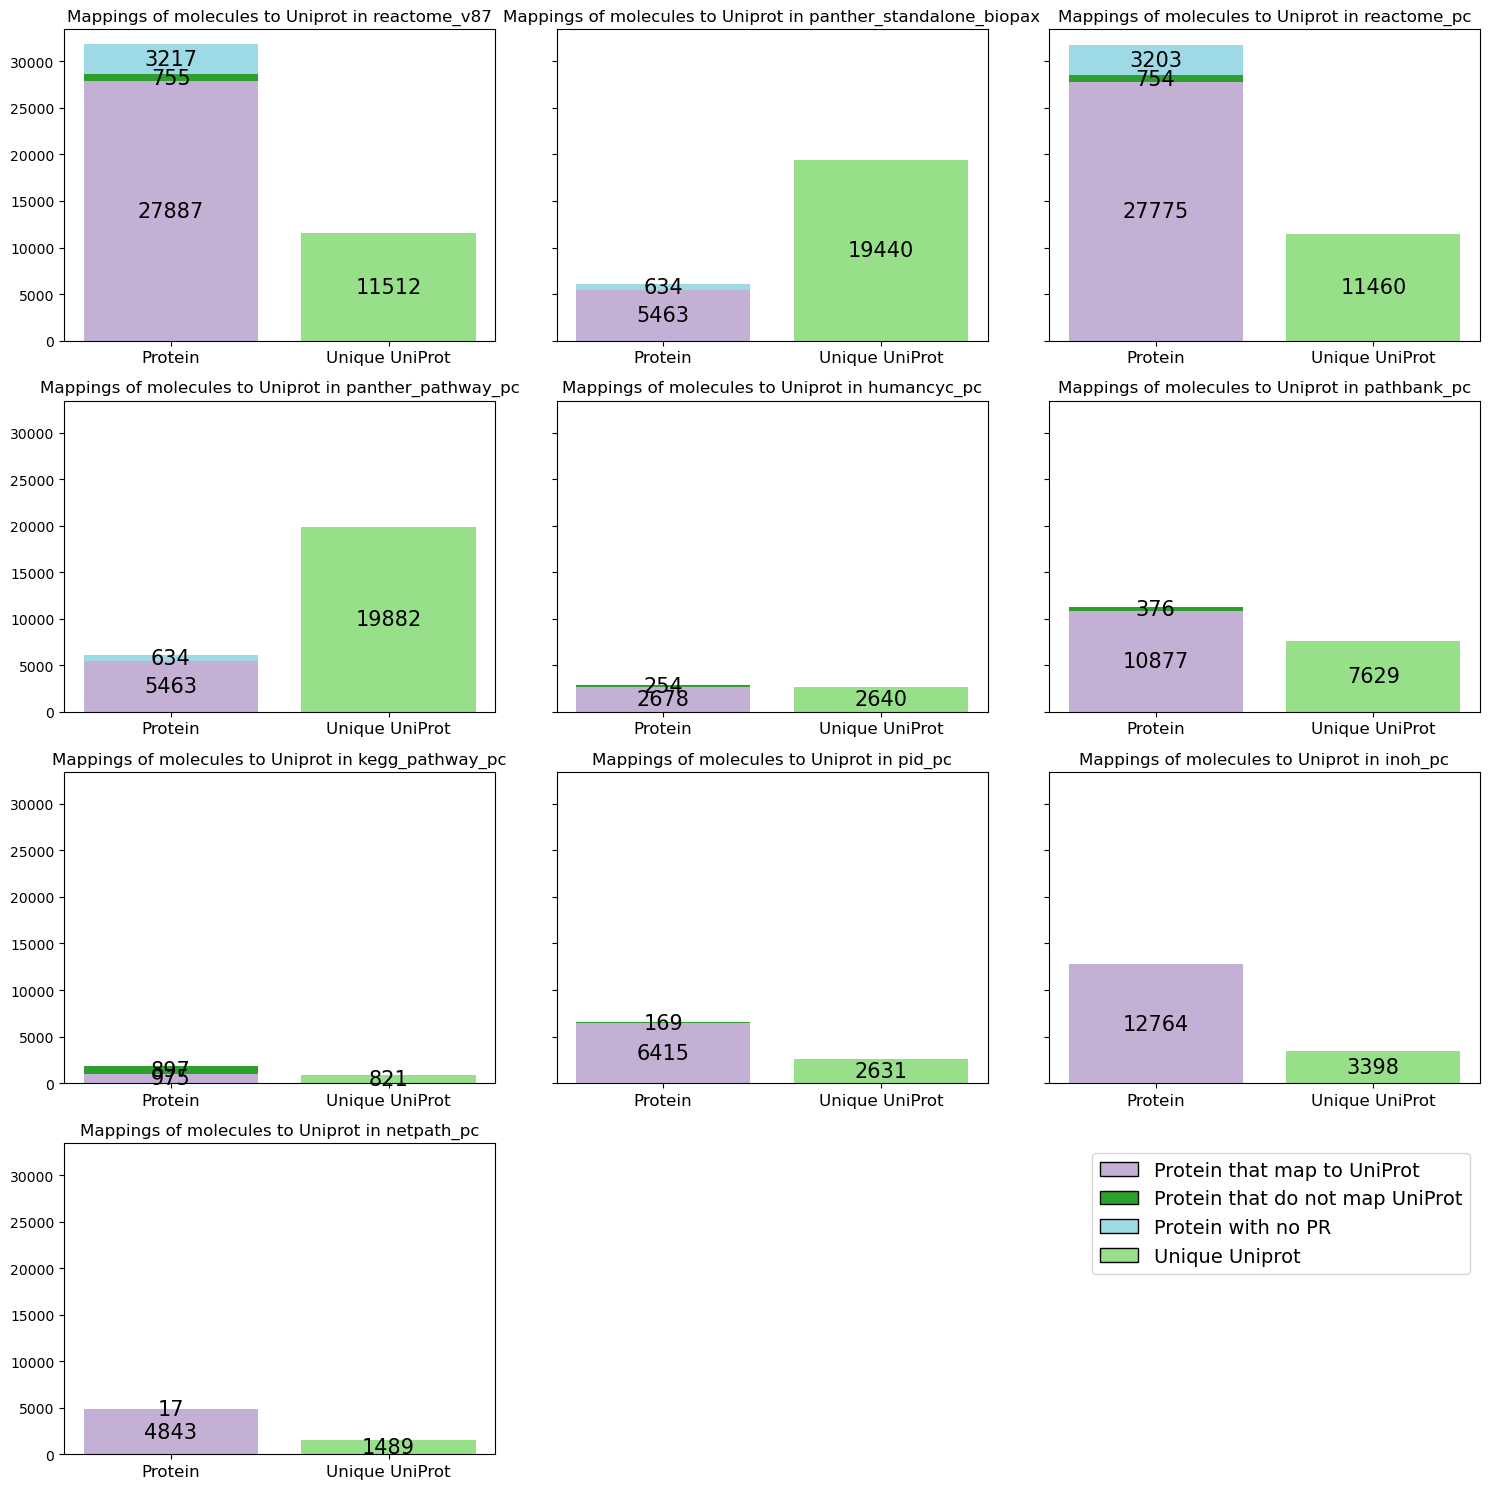

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(15,15), sharey=True)
uniprot_abs = ["Protein", "Unique UniProt"]

def plot_stack_barplot_uniprot(ax, col, new_df):
    bars1 = ax.bar(uniprot_abs, new_df[col], color=["#C5B0D5", "#98DF8A"])
    bars2 = ax.bar(uniprot_abs, new_df["no map"], bottom=new_df[col], color="#2CA02C")
    bars3 = ax.bar(uniprot_abs, new_df["no pr"], bottom=new_df[col]+new_df["no map"], color="#9EDAE5")
    ax.tick_params(axis='x', labelsize=12)
    ax.set_title(f"Mappings of molecules to Uniprot in {col}", fontsize=12)

    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            if height != 0:
                height = bar.get_height()
                bottom = bar.get_y()
                ax.text(bar.get_x() + bar.get_width()/2., bottom + height/2, '%d' % int(height), ha='center', va='center', fontsize=15)

legend_elements = [Patch(facecolor="#C5B0D5", edgecolor='black', label='Protein that map to UniProt'),
                   Patch(facecolor="#2CA02C", edgecolor='black', label='Protein that do not map UniProt'),
                   Patch(facecolor="#9EDAE5", edgecolor='black', label='Protein with no PR'),
                   Patch(facecolor="#98DF8A", edgecolor='black', label='Unique Uniprot')]
plt.legend(handles=legend_elements, loc="upper right", fontsize=14)


reactome_v87 = plot_stack_barplot_uniprot(ax=axs[0, 0], col="reactome_v87", new_df=subdata_reactome_v87_uniprot)
panther_standalone = plot_stack_barplot_uniprot(ax=axs[0, 1], col="panther_standalone_biopax", new_df=subdata_panther_standalone_uniprot)
reactome_pc = plot_stack_barplot_uniprot(ax=axs[0, 2], col="reactome_pc", new_df=subdata_reactome_pc_uniprot)
panther_pathway_pc = plot_stack_barplot_uniprot(ax=axs[1, 0], col="panther_pathway_pc", new_df=subdata_panther_pathway_pc_uniprot)
humancyc_pc = plot_stack_barplot_uniprot(ax=axs[1, 1], col="humancyc_pc", new_df=subdata_humancyc_pc_uniprot)
pathbank_pc = plot_stack_barplot_uniprot(ax=axs[1, 2], col="pathbank_pc", new_df=subdata_pathbank_pc_uniprot)
kegg_pathway_pc = plot_stack_barplot_uniprot(ax=axs[2, 0], col="kegg_pathway_pc", new_df=subdata_kegg_pathway_pc_uniprot)
pid_pc = plot_stack_barplot_uniprot(ax=axs[2, 1], col="pid_pc", new_df=subdata_pid_pc_uniprot)
inoh_pc = plot_stack_barplot_uniprot(ax=axs[2, 2], col="inoh_pc", new_df=subdata_inoh_pc_uniprot)
netpath_pc = plot_stack_barplot_uniprot(ax=axs[3, 0], col="netpath_pc", new_df=subdata_netpath_pc_uniprot)
axs[3, 1].axis('off')
axs[3, 2].axis('off')

plt.tight_layout()
plt.savefig("../Results/SuppFigS4_Mappings_UniProt_All_Databases.png", dpi=300)
plt.savefig("../Results/SuppFigS4_Mappings_UniProt_All_Databases.svg", dpi=300)
plt.show()

#### Supplementary Figure S5

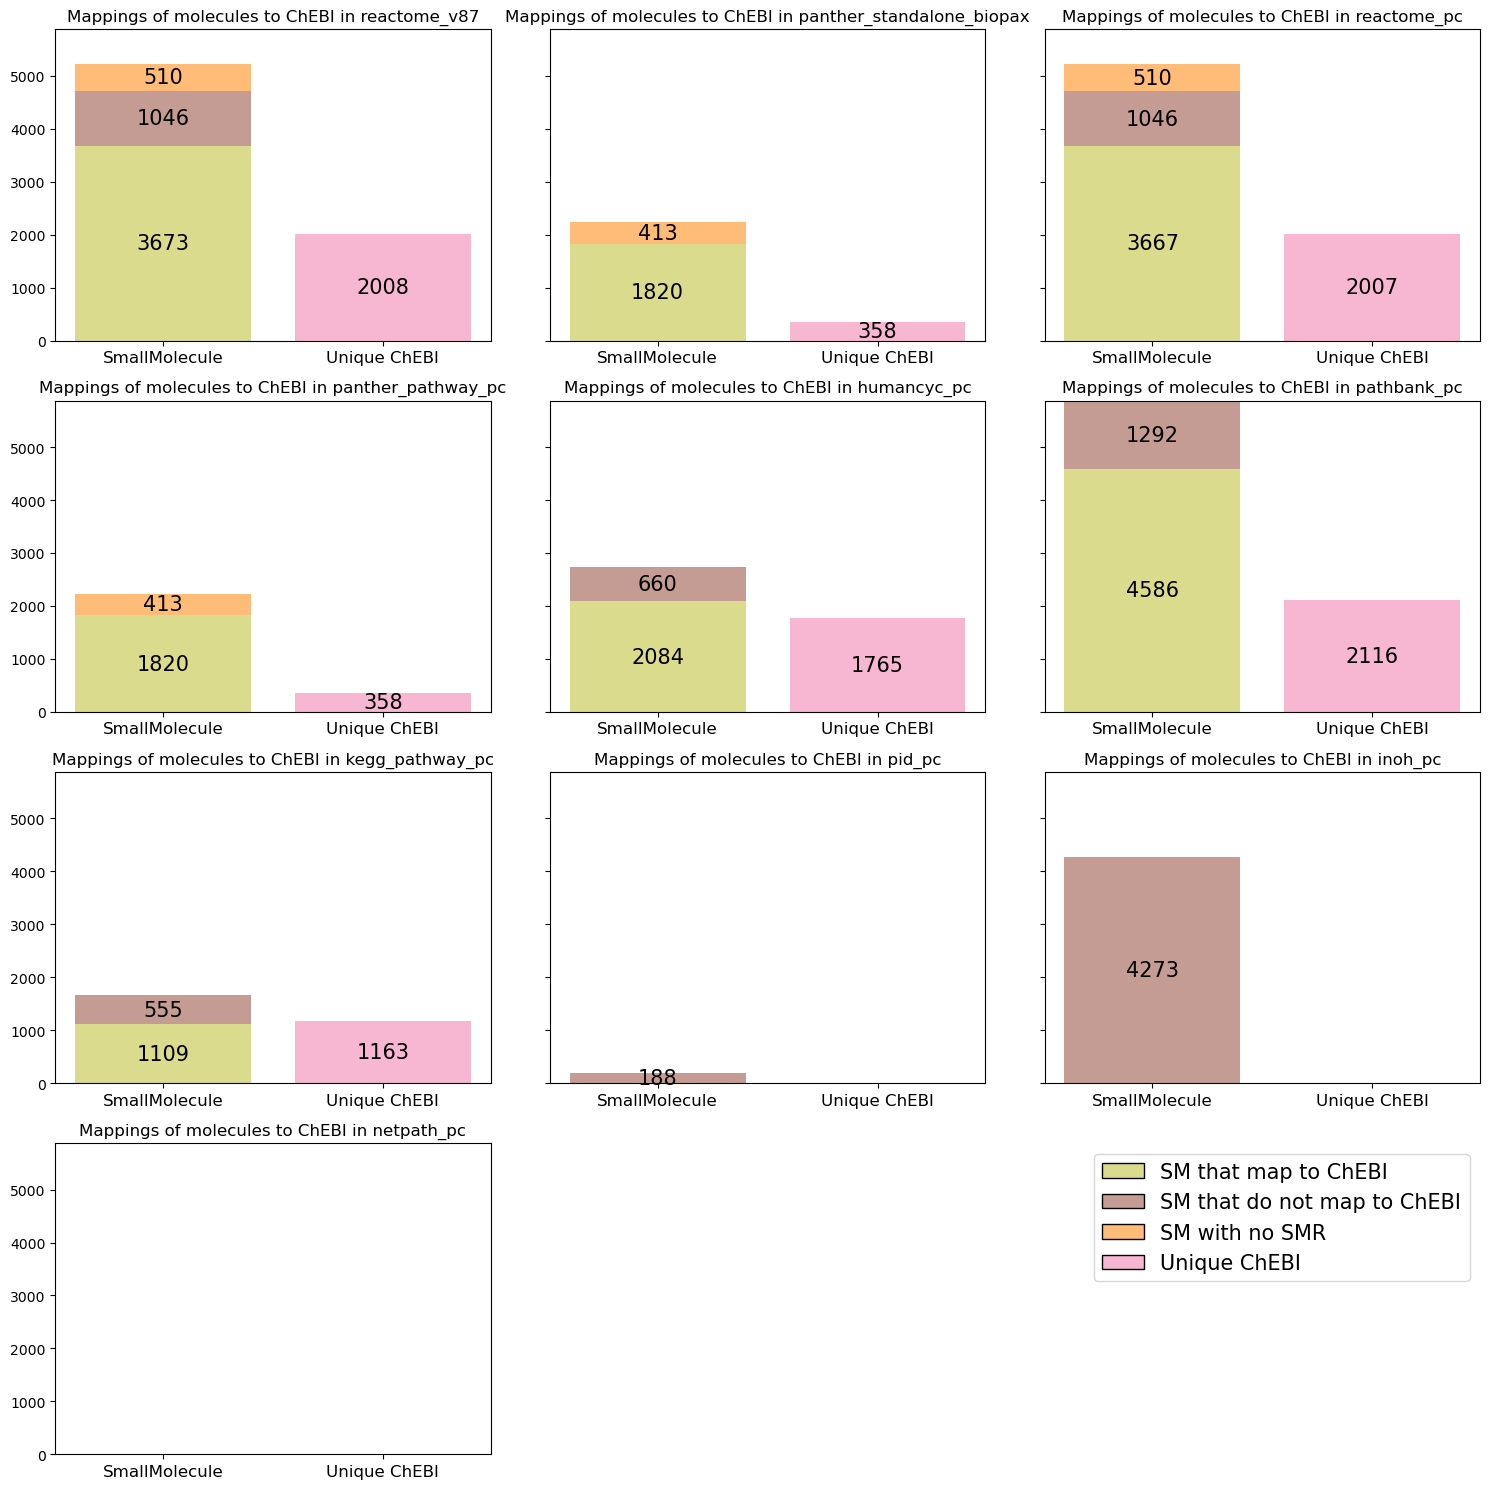

In [14]:
fig, axs = plt.subplots(4, 3, figsize=(15,15), sharey=True)
chebi_abs = ["SmallMolecule", "Unique ChEBI"]

def plot_stack_barplot_chebi(ax, col, new_df):
    bars1 = ax.bar(chebi_abs, new_df[col], color=["#DBDB8D", "#F7B6D2"])
    bars2 = ax.bar(chebi_abs, new_df["no map"], bottom=new_df[col] , color="#C49C94")
    bars3 = ax.bar(chebi_abs, new_df["no smr"], bottom=new_df["no map"]+new_df[col], color="#FFBB78")
    #ax.legend(["count 1", "Small Molecule with no SMR", "SMR that do not map to ChEBI"])
    ax.tick_params(axis='x', labelsize=12)
    ax.set_title(f"Mappings of molecules to ChEBI in {col}", fontsize=12)

    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            if height != 0:
                height = bar.get_height()
                bottom = bar.get_y()
                ax.text(bar.get_x() + bar.get_width()/2., bottom + height/2, '%d' % int(height), ha='center', va='center', fontsize=15)


legend_elements = [Patch(facecolor="#DBDB8D", edgecolor='black', label='SM that map to ChEBI'),
                   Patch(facecolor='#C49C94', edgecolor='black', label='SM that do not map to ChEBI'),
                       Patch(facecolor="#FFBB78", edgecolor='black', label='SM with no SMR'),
                       Patch(facecolor= "#F7B6D2", edgecolor='black', label='Unique ChEBI')]
plt.legend(handles=legend_elements, loc = "upper right", fontsize=15)


reactome_v87 = plot_stack_barplot_chebi(ax=axs[0, 0], col="reactome_v87", new_df=subdata_reactome_v87_chebi)
panther_standalone = plot_stack_barplot_chebi(ax=axs[0, 1], col="panther_standalone_biopax", new_df=subdata_panther_standalone_chebi)
reactome_pc = plot_stack_barplot_chebi(ax=axs[0, 2], col="reactome_pc", new_df=subdata_reactome_pc_chebi)
panther_pathway_pc = plot_stack_barplot_chebi(ax=axs[1, 0], col="panther_pathway_pc", new_df=subdata_panther_pathway_pc_chebi)
humancyc_pc = plot_stack_barplot_chebi(ax=axs[1, 1], col="humancyc_pc", new_df=subdata_humancyc_pc_chebi)
pathbank_pc = plot_stack_barplot_chebi(ax=axs[1, 2], col="pathbank_pc", new_df=subdata_pathbank_pc_chebi)
kegg_pathway_pc = plot_stack_barplot_chebi(ax=axs[2, 0], col="kegg_pathway_pc", new_df=subdata_kegg_pathway_pc_chebi)
pid_pc = plot_stack_barplot_chebi(ax=axs[2, 1], col="pid_pc", new_df=subdata_pid_pc_chebi)
inoh_pc = plot_stack_barplot_chebi(ax=axs[2, 2], col="inoh_pc", new_df=subdata_inoh_pc_chebi)
netpath_pc = plot_stack_barplot_chebi(ax=axs[3, 0], col="netpath_pc", new_df=subdata_netpath_pc_chebi)

axs[3, 1].axis('off')
axs[3, 2].axis('off')

plt.tight_layout()
plt.savefig("../Results/SuppFigS5_Mappings_ChEBI_All_Databases.png", dpi=300)
plt.savefig("../Results/SuppFigS5_Mappings_ChEBI_All_Databases.svg", dpi=300)
plt.show()